In [8]:
import numpy as np
import matplotlib.pyplot as plt

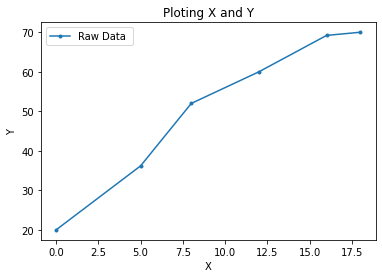

In [9]:
#Data for evaluation
X = np.array([0, 5.0, 8, 12, 16, 18])
Y = np.array([20, 36.2, 52, 60, 69.2, 70])

plt.plot(X,Y, label='Raw Data ', marker='.')
plt.title('Ploting X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [10]:
#returns a function that returns the value y for a given x and the string expression of the polynomial
def nonlinear_polynomial(X, Y, order = 2):
    
    n = len(X)
    M = np.zeros((order+1, order+1))
    M[0][0] = n
    b = np.zeros((order+1, 1))

    for i in range(order+1):
        if(i == 0):
            b[i][0] = np.sum(Y)
        else:
            b[i][0] = np.sum(np.power(X, i) * Y)


    for i in range(order+1):
        for j in range(order+1):
            if(i+j == 0):
                M[i][j] = n
            else:
                M[i][j] = np.sum(np.power(X, i+j))
    
    A = np.dot(np.linalg.inv(M), b)
    def func(x):
        y=0
        for i in range(order+1):
            y += A[i][0]* x**i
        return y
    
    math_expression = 'f(t) = '
    for i in range(order,-1,-1):
        math_expression += f'({A[i][0]}) * t**{i} + ' if i != 0 else f'({A[i][0]})'


    f = func
    return f,math_expression


order = 4
f,exp = nonlinear_polynomial(X,Y,order)


In [12]:
#evaluation for the derived function
order = 4
f,exp = nonlinear_polynomial(X,Y,order)
print(exp)
X_plot = np.arange(start=X[0], stop=X[-1], step=(X[-1]-X[0])/100)
Y_plot = []
for i in range(len(X_plot)):
    Y_plot.append(f(X_plot[i]))

plt.scatter(X,Y, label = 'Normal Approximation', color='r', marker='.')
plt.plot(X_plot, Y_plot, label = 'Regression')
plt.title(f'Regression evaluation of order {order}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



KeyboardInterrupt: 

# <u>Observations:</u>

1. In the figure, we see that the values given quite cleanly fit the polinomial of order 4 and upon changing the order to 6 or 7 the function starts to unfit the points.
2. Also the expression string shows the mathematical polinomial function correctly.